In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


df = pd.read_csv("cleaned_ebay_deals.csv")
df.head()


,Timestamp,Title,Price,Original_price,Shipping,Item_url,discount_percentage
0,3/19/2025 17:19,Microsoft Xbox Series S,299.00,299.00,Shipping info unavailable,https://www.ebay.com/itm/266190900217?_trkparm...,0.0
1,3/19/2025 17:19,Apple iPhone 15 Pro 256gb ( Unlocked) US E-Sim...,674.99,674.99,Shipping info unavailable,https://www.ebay.com/itm/166613095133?_trkparm...,0.0
2,3/19/2025 17:19,Google Pixel 8 Pro 128GB Factory Unlocked - Ex...,383.99,383.99,Shipping info unavailable,https://www.ebay.com/itm/226348022590?_trkparm...,0.0
3,3/19/2025 17:19,Seagate EXOS X16 ST14000NM005G 14TB 256MB 7200...,147.99,147.99,Shipping info unavailable,https://www.ebay.com/itm/176825170520?_trkparm...,0.0
4,3/19/2025 17:19,Apple iPhone 14 Pro 128GB Unlocked - Excellent,446.95,446.95,Shipping info unavailable,https://www.ebay.com/itm/405469724990?_trkparm...,0.0


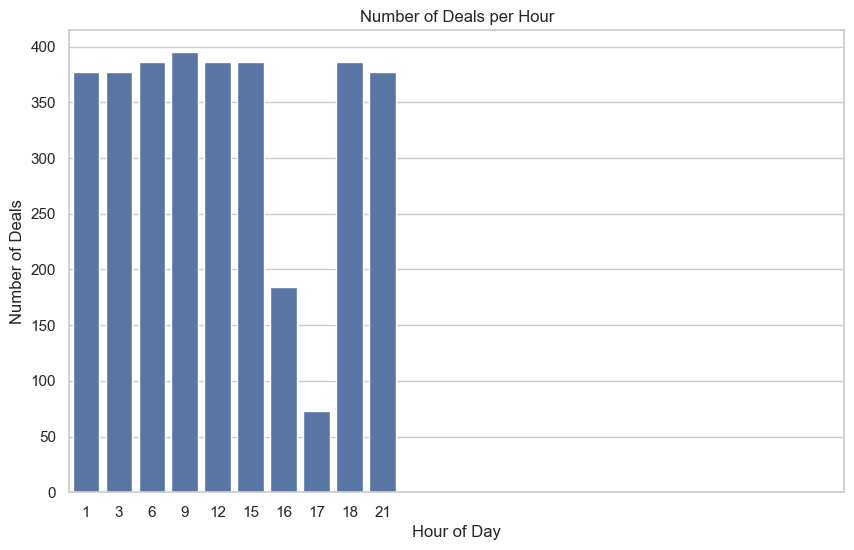

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['hour'] = df['Timestamp'].dt.hour

deals_per_hour = df.groupby('hour').size()

plt.figure(figsize=(10,6))
sns.barplot(x=deals_per_hour.index, y=deals_per_hour.values)
plt.title("Number of Deals per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Deals")
plt.xticks(range(0, 24))
plt.show()


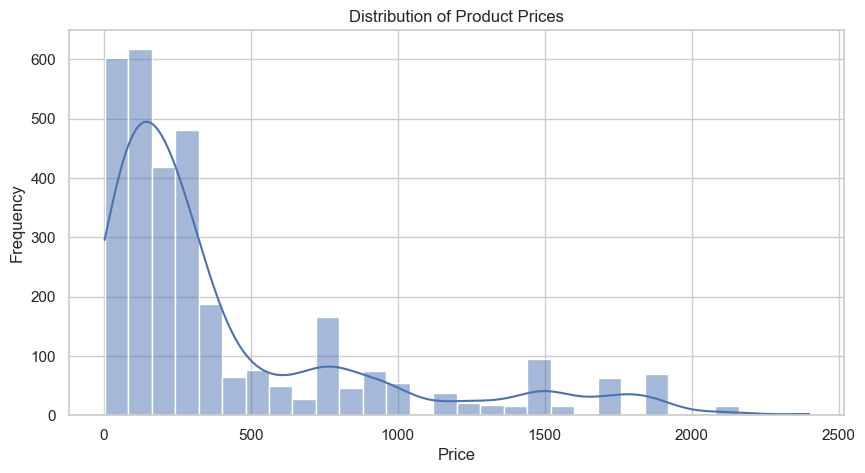

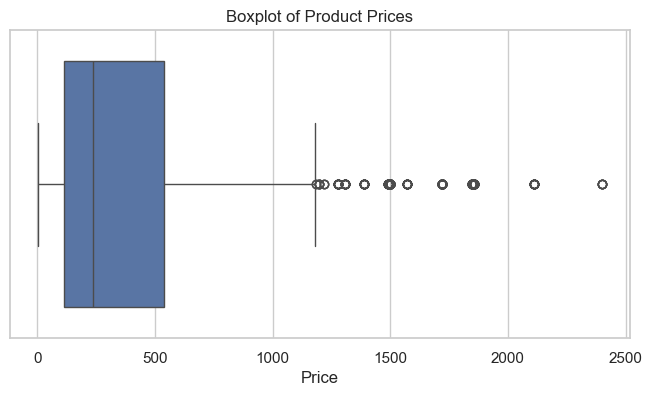

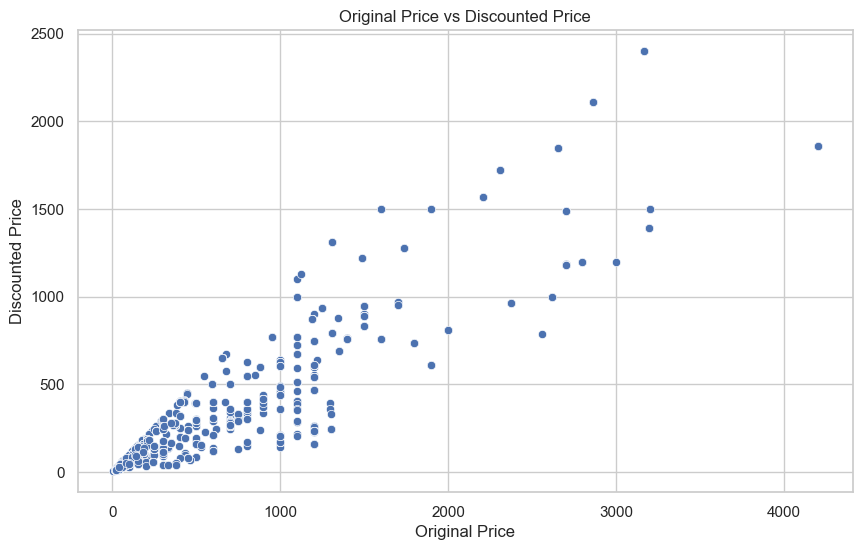

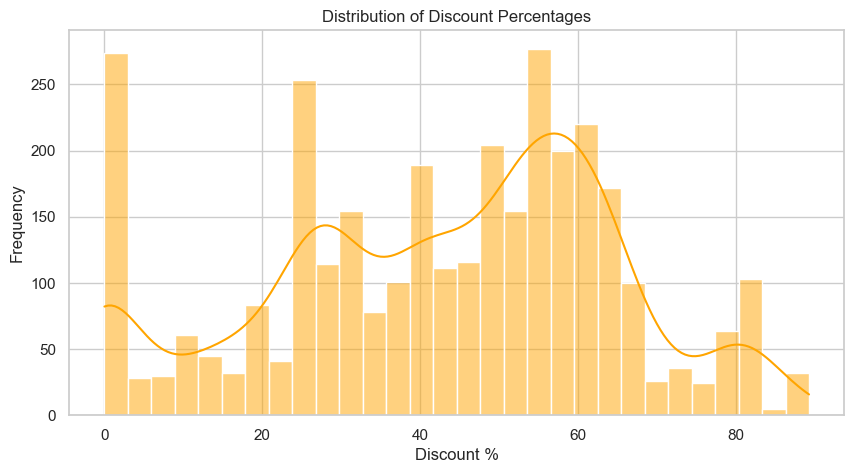

In [6]:

plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price'])
plt.title("Boxplot of Product Prices")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Original_price', y='Price', data=df)
plt.title("Original Price vs Discounted Price")
plt.xlabel("Original Price")
plt.ylabel("Discounted Price")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='orange')
plt.title("Distribution of Discount Percentages")
plt.xlabel("Discount %")
plt.ylabel("Frequency")
plt.show()


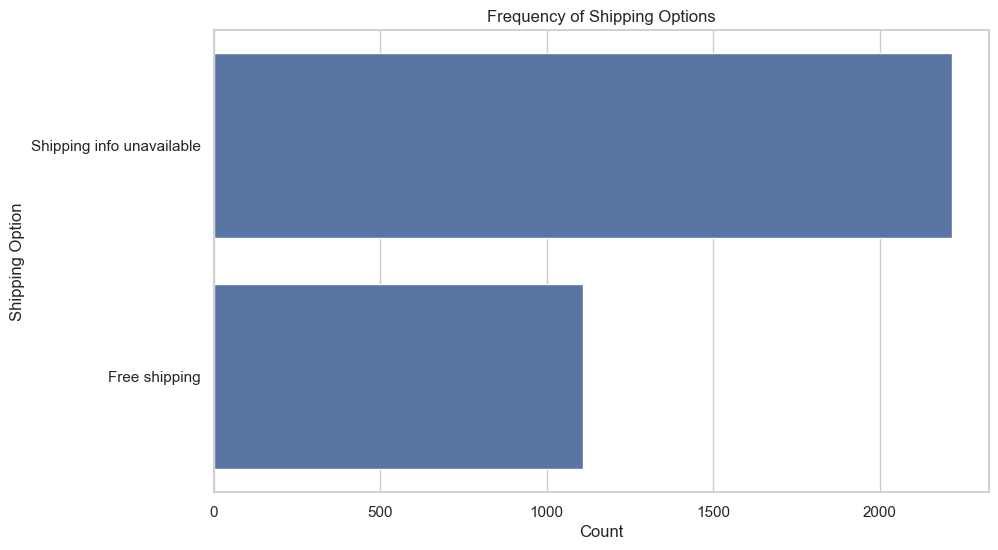

In [7]:

shipping_counts = df['Shipping'].value_counts()


plt.figure(figsize=(10,6))
sns.barplot(x=shipping_counts.values, y=shipping_counts.index)
plt.title("Frequency of Shipping Options")
plt.xlabel("Count")
plt.ylabel("Shipping Option")
plt.show()


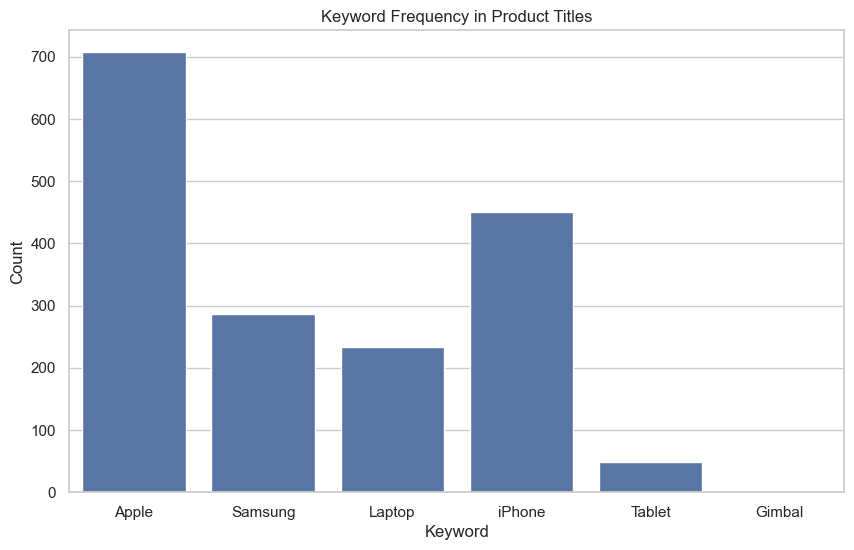

In [8]:

keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]


keyword_counts = {kw: df['Title'].str.contains(kw, case=False, na=False).sum() for kw in keywords}

plt.figure(figsize=(10,6))
sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()))
plt.title("Keyword Frequency in Product Titles")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()


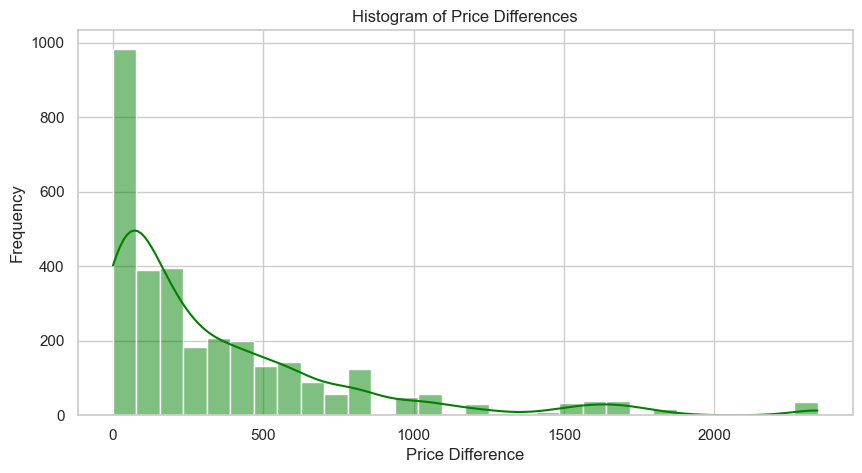

In [9]:

df['price_diff'] = df['Original_price'] - df['Price']

plt.figure(figsize=(10,5))
sns.histplot(df['price_diff'], bins=30, kde=True, color='green')
plt.title("Histogram of Price Differences")
plt.xlabel("Price Difference")
plt.ylabel("Frequency")
plt.show()


In [10]:
top_discounts = df.sort_values(by='discount_percentage', ascending=False).head(5)
top_discounts[['Title', 'Price', 'Original_price', 'discount_percentage', 'Item_url']]


,Title,Price,Original_price,discount_percentage,Item_url
951,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,40.99,379.99,89.21,https://www.ebay.com/itm/255891868634?_trkparm...
2482,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,40.99,379.99,89.21,https://www.ebay.com/itm/255891868634?_trkparm...
1335,Samsung Galaxy Watch4 44mm R870 GPS - Good,37.99,299.99,87.34,https://www.ebay.com/itm/255870647774?_trkparm...
954,Samsung Galaxy Watch4 44mm R870 GPS - Good,37.99,299.99,87.34,https://www.ebay.com/itm/255870647774?_trkparm...
775,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,87.25,https://www.ebay.com/itm/387587045897?_trkparm...
